# Using Poisson function to interpolate scalar field

## 2.1 Function for one iteration of Poisson Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import copy

In [3]:
def poisson_naive(u, q, dx, dy, **kwds):
    """Naive implementation of Poisson equation with loops"""
    nx, ny = u.shape
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u[i,j] = (dy**2 * (u[i-1,j] + u[i+1,j]) + \
                      dx**2 * (u[i,j-1] + u[i,j+1]) - \
                               dx**2 * dy**2 * q[i,j] / (2 * dx**2 + dy**2))
    return u

In [2]:
def poisson_iteration(u, q, dx, dy, **kwds):
    """Perform a single iteration for the 2-D poisson equation"""
    iter_type = kwds.get("iter_type", "gs") # use Gauss-Seidel as default
    if iter_type == "gs":
        u[1:-1,1:-1] = (dy**2 * (u[:-2,1:-1] + u[2:,1:-1]) + \
                       dx**2 * (u[1:-1,:-2] + u[1:-1,2:])  - \
                       dx**2 * dy**2 * q[1:-1, 1:-1]) / (2 * (dx**2 + dy**2))
    elif iter_type == "jacobi":
        u_prev = copy.deepcopy(u)
        u[1:-1,1:-1] = (dy**2 * (u_prev[:-2,1:-1] + u_prev[2:,1:-1]) + \
                       dx**2 * (u_prev[1:-1,:-2] + u_prev[1:-1,2:])  - \
                       dx**2 * dy**2 * q[1:-1, 1:-1]) / (2 * (dx**2 + dy**2))        
    return u

In [3]:
# Set values
nx = 50
ny = 25
x_max = 100.
y_max = 50.
u_0 = 15.
u_1 = 10.
q_0 = 0.
q_1 = 0.25
k = 1.
n_max = 1E5
e_tol = 1E-5

In [4]:
# initialise u
u_init = np.ones((nx, ny)) * (u_0 + u_1) / 2.
# initialise source term
q = np.zeros((nx, ny))
# determine dx, dy
dx = x_max / nx
dy = y_max / ny

In [5]:
poisson_iteration(u_init, q, dx, dy)

array([[12.5, 12.5, 12.5, ..., 12.5, 12.5, 12.5],
       [12.5, 12.5, 12.5, ..., 12.5, 12.5, 12.5],
       [12.5, 12.5, 12.5, ..., 12.5, 12.5, 12.5],
       ...,
       [12.5, 12.5, 12.5, ..., 12.5, 12.5, 12.5],
       [12.5, 12.5, 12.5, ..., 12.5, 12.5, 12.5],
       [12.5, 12.5, 12.5, ..., 12.5, 12.5, 12.5]])

## 2.2 Solve Laplace equation in 2-D

In [6]:
# set boundary conditions
u = u_init.copy()
u[0,:] = u_0
u[-1,:] = u_1

In [7]:
u = u_init.copy()
for i in range(int(n_max)):
    u_last = u.copy()
    # reset boundary conditions
    # dirichlet
    u[0,:] = u_0
    u[-1,:] = u_1
    # neumann
    u[:,0] = u[:,1] + q_0 / k * dx
    u[:,-1] = u[:,-2] + q_1 / k * dx
    # perform iteration
    u = poisson_iteration(u, q, dx, dy, iter_type = "jacobi")
    # check convergence
    epsilon = np.sqrt(np.sum((u.ravel() - u_last.ravel())**2))
    # print epsilon
    if  epsilon < e_tol: break

Performed 9485 iterations


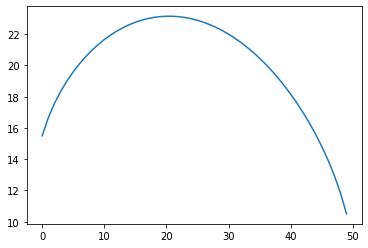

In [8]:
print("Performed %d iterations" % i)
plt.plot(u[:,-1])

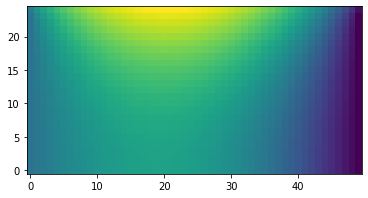

In [9]:
# create plot
x = np.arange(0, x_max, dx)
y = np.arange(0, y_max, dy)
X, Y = np.meshgrid(x, y, indexing="ij")
plt.imshow(u.transpose(), interpolation = 'nearest', origin = 'lower left')

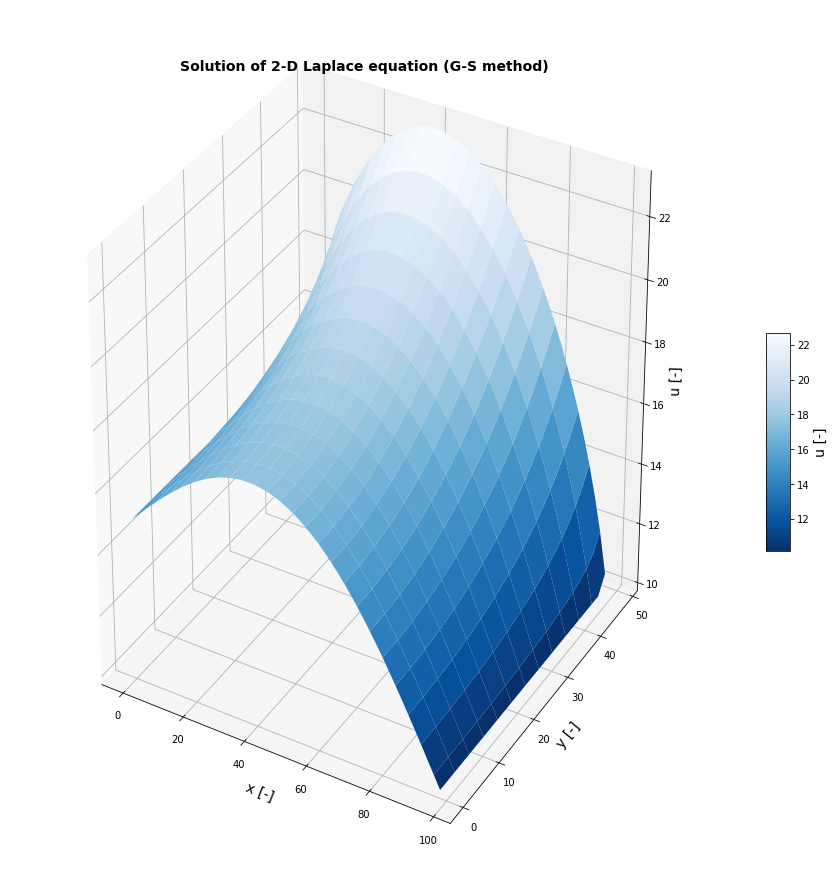

In [10]:
# Create 3-D plot

fig = plt.figure(figsize = (16,16));
ax = fig.add_subplot(111, projection = '3d') #, aspect = 'equal');

ax.set_title("Solution of 2-D Laplace equation (G-S method)" \
             ,fontsize = 14, fontweight = 'bold');
surf = ax.plot_surface(X, Y, u, rstride = 2, cstride = 2, cmap = 'Blues_r'); 
ax.set_xlabel("x [-]",fontsize = 14);
ax.set_ylabel("y [-]",fontsize = 14);
ax.set_zlabel("u [-]",fontsize = 14);

cbar = fig.colorbar(surf, shrink = 0.25, aspect = 9);
cbar.set_label("u [-]", fontsize = 14);

plt.show();

In [11]:
np.max(u), np.min(u)

(23.151143647134216, 10.0)

## 2.3 Add a source and sink

In [12]:
q[int(0.25 * nx), int(0.25 * ny)] = 25.
q[int(0.75 * nx), int(0.75 * ny)] = -25.

In [23]:
u = u_init.copy()
for i in range(int(n_max)):
    u_last = u.copy()
    # reset boundary conditions
    # dirichlet
    # u[0,:] = u_0
    # u[-1,:] = u_1
    # no flow
    u[0,:] = u[1,:]
    u[-1,:] = u[-2,:]
    # neumann
    u[:,0] = u[:,1] + q_0 / k * dy
    u[:,-1] = u[:,-2] + q_1 / k * dy
    # perform iteration
    u = poisson_iteration(u, q, dx, dy)
    # check convergence
    epsilon = np.sqrt(np.sum((u.ravel() - u_last.ravel())**2))
    # print epsilon
    if  epsilon < e_tol: break

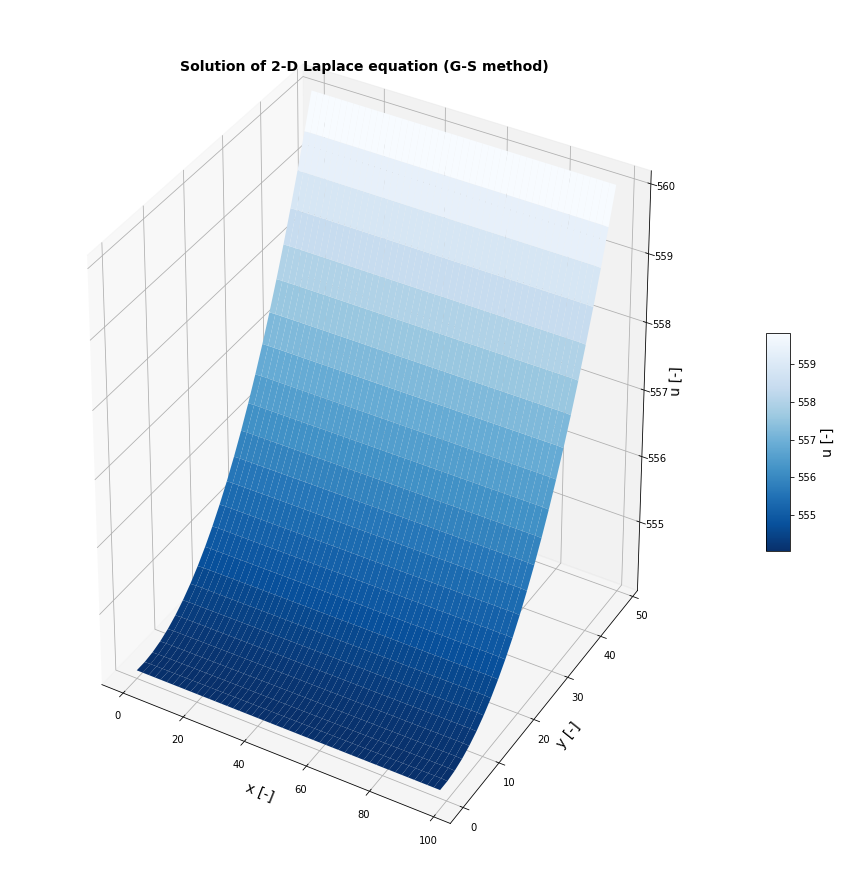

In [24]:
# Create 3-D plot

fig = plt.figure(figsize = (16,16));
ax = fig.add_subplot(111, projection = '3d') #, aspect = 'equal');

ax.set_title("Solution of 2-D Laplace equation (G-S method)" \
             ,fontsize = 14, fontweight = 'bold');
surf = ax.plot_surface(X, Y, u, rstride = 1, cstride = 1, cmap = 'Blues_r'); 
ax.set_xlabel("x [-]",fontsize = 14);
ax.set_ylabel("y [-]",fontsize = 14);
ax.set_zlabel("u [-]",fontsize = 14);

cbar = fig.colorbar(surf, shrink = 0.25, aspect = 9);
cbar.set_label("u [-]", fontsize = 14);

plt.show();

In [160]:
np.max(u), np.min(u)

(96.096716482688748, -61.62157856972344)

In [12]:
q[int(0.25 * nx), int(0.25 * ny)] = 25.
q[int(0.75 * nx), int(0.75 * ny)] = -25.

In [45]:

q = np.zeros((nx, ny))
# q[:,10] = 25

In [52]:
u = u_init.copy()
for i in range(int(n_max)):
    u_last = u.copy()
    # reset boundary conditions
    # dirichlet
    u[0,:] = u_0
    u[-1,:] = u_1
    # no flow
    u[0,:] = u[1,:]
    u[-1,:] = u[-2,:]    
    # neumann
    u[:,0] = u[:,1] # + q_0 / k * dy
    u[:,-1] = u[:,-2] # + q_1 / k * dy
    # set values
    u[10,:] = 10
    u[30,:] = 30
    
    # perform iteration
    u = poisson_iteration(u, q, dx, dy)
    # check convergence
    epsilon = np.sqrt(np.sum((u.ravel() - u_last.ravel())**2))
    # print epsilon
    if  epsilon < e_tol: break

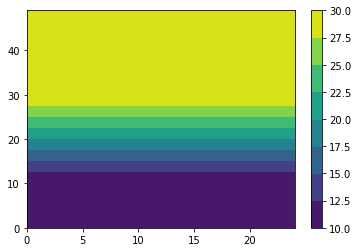

In [53]:
# plt.imshow(u_init)
plt.contourf(u)
plt.colorbar()

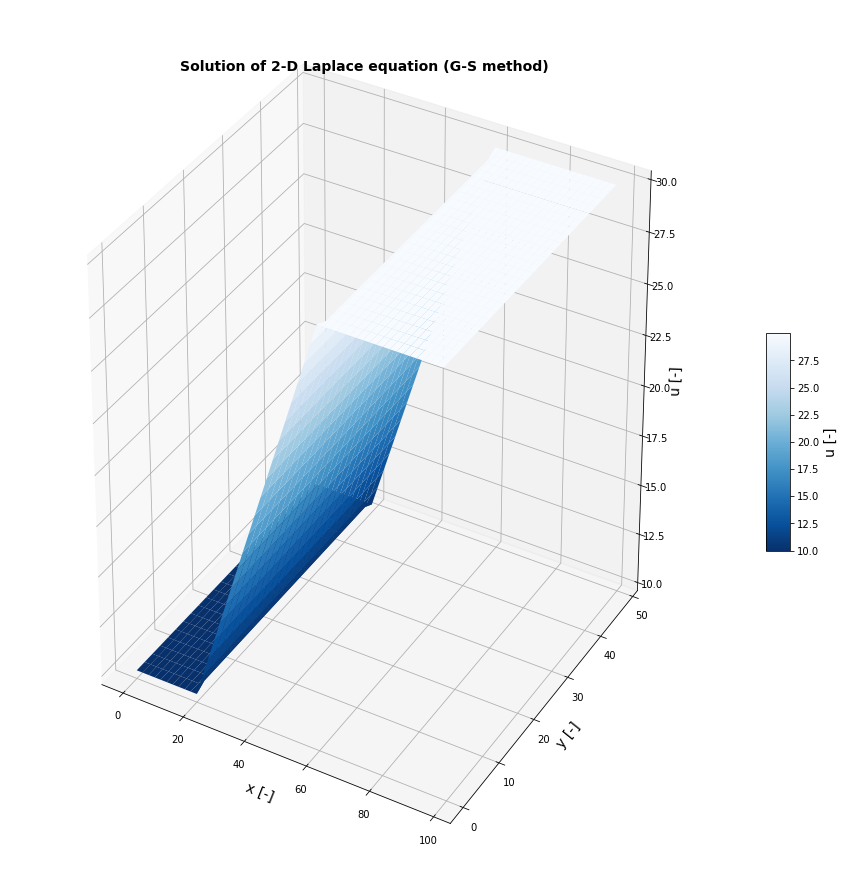

In [54]:
# Create 3-D plot

fig = plt.figure(figsize = (16,16));
ax = fig.add_subplot(111, projection = '3d') #, aspect = 'equal');

ax.set_title("Solution of 2-D Laplace equation (G-S method)" \
             ,fontsize = 14, fontweight = 'bold');
surf = ax.plot_surface(X, Y, u, rstride = 1, cstride = 1, cmap = 'Blues_r'); 
ax.set_xlabel("x [-]",fontsize = 14);
ax.set_ylabel("y [-]",fontsize = 14);
ax.set_zlabel("u [-]",fontsize = 14);

cbar = fig.colorbar(surf, shrink = 0.25, aspect = 9);
cbar.set_label("u [-]", fontsize = 14);

plt.show();